In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("../src")

In [3]:
import collections
import numpy as np
import arviz as az
import pandas as pd

import scipy.stats as stats
from matplotlib import pyplot as plt

In [4]:
import pymc3 as pm

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [5]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
CHERRY_BLOSSOMS_DATASET_PATH = f"{_BASE_URL}/cherry_blossoms.csv"

In [6]:
howel_data = pd.read_csv(HOWELL_DATASET_PATH, sep=";", header=0)
howel_data_adult = howel_data.query("age > 18")

In [7]:
howel_data_adult.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


In [8]:
howel_data_adult.height

0      151.765
1      139.700
2      136.525
3      156.845
4      145.415
        ...   
534    162.560
537    142.875
540    162.560
541    156.210
543    158.750
Name: height, Length: 346, dtype: float64

In [9]:
with pm.Model() as model_instance:
    mu = pm.Normal("mu", mu=178, sd=20)
    sigma = pm.Uniform("sigma", lower=0, upper=50)
    height = pm.Normal(
        "height",
        mu=mu,
        sd=sigma,
        observed=howel_data_adult.height.values.astype(np.float32),
    )

In [14]:
with model_instance:
    trace = pm.sample(1000, tune=1000)
    prior = pm.sample_prior_predictive()
    posterior_predictive = pm.sample_posterior_predictive(trace)

pm_data = az.from_pymc3(
    trace=trace, prior=prior, posterior_predictive=posterior_predictive,
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, mu]
100%|██████████| 2000/2000 [00:03<00:00, 539.71it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fced28f5c10>],
      dtype=object)

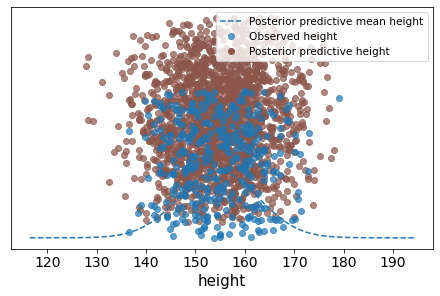

In [24]:
az.plot_ppc(pm_data, kind="scatter", jitter=10)